# DBSCAN - Density-Based Spatial Clustering Applications with Noises

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

### Generate synthetic dataset

In [2]:
X, y_true = make_moons(n_samples = 300, noise = 0.05, random_state = 42)

### Visualize the data

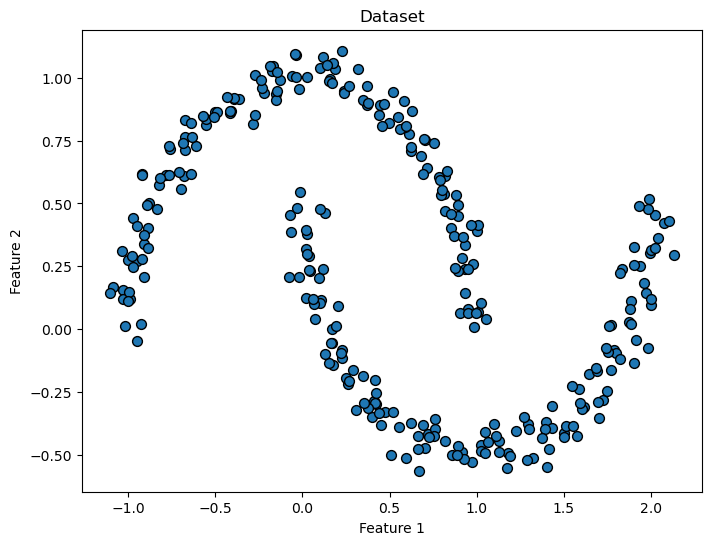

In [3]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], s = 50, marker = 'o', edgecolor = 'k')
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Applying DBSCAN

In [4]:
dbscan = DBSCAN(eps = 0.2, min_samples = 5)
y_dbscan = dbscan.fit_predict(X)

### Visualizing Clustering Results

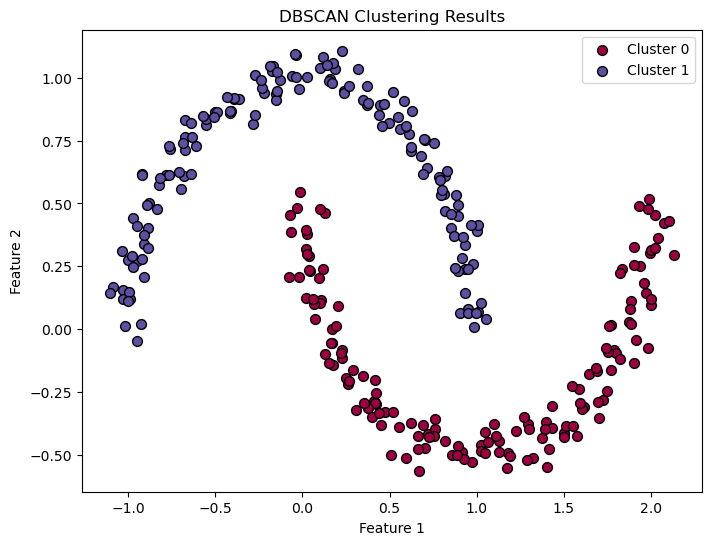

In [5]:
plt.figure(figsize = (8, 6))

unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 
                                                         len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        ## Black for noise
        color = [0, 0, 0, 1]
    plt.scatter(
        X[y_dbscan == label, 0],
        X[y_dbscan == label, 1],
        s = 50,
        color = color,
        label = f"Cluster {label}" if label != -1 else "Noise",
        edgecolor = "k"
    )

plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.legend()
plt.show()

### Evaluate Clustering

#### _Silhouette Score (only for clusters with more than one label)_

In [6]:
if len(set(y_dbscan)) > 1 and -1 not in y_dbscan:
    silhouette = silhouette_score(X, y_dbscan)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score is not defined for one cluster or when noise is present.")

Silhouette Score: 0.33078776489960326


### Define the Parameter grid

In [7]:
param_grid = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': [4,5,6,7,8,9,10]
}

### Function to perform hyperparamter tuning

In [8]:
def tune_dbscan(X, param_grid):
    best_score = -1
    best_params = None
    best_model = None
    
    for params in ParameterGrid(param_grid):
        eps = params['eps']
        min_samples = params['min_samples']
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        y_dbscan = dbscan.fit_predict(X)
        
        if len(set(y_dbscan)) > 1:
            score = silhouette_score(X, y_dbscan)
            print(f"eps = {eps:.2f}, min_samples = {min_samples}: ")
            print(f"Silhouette Score = {score:.4f}")
            
            if score > best_score:
                best_score = score
                best_params = params
                best_model = dbscan
                
    return best_params, best_score, best_model

In [9]:
best_params, best_score, best_model = tune_dbscan(X, param_grid)

eps = 0.10, min_samples = 4: 
Silhouette Score = 0.2538
eps = 0.10, min_samples = 5: 
Silhouette Score = 0.2902
eps = 0.10, min_samples = 6: 
Silhouette Score = 0.3829
eps = 0.10, min_samples = 7: 
Silhouette Score = 0.2967
eps = 0.10, min_samples = 8: 
Silhouette Score = 0.1524
eps = 0.10, min_samples = 9: 
Silhouette Score = 0.0738
eps = 0.10, min_samples = 10: 
Silhouette Score = -0.1920
eps = 0.20, min_samples = 4: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 5: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 6: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 7: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 8: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 9: 
Silhouette Score = 0.3308
eps = 0.20, min_samples = 10: 
Silhouette Score = 0.3308
eps = 0.30, min_samples = 4: 
Silhouette Score = 0.3308
eps = 0.30, min_samples = 5: 
Silhouette Score = 0.3308
eps = 0.30, min_samples = 6: 
Silhouette Score = 0.3308
eps = 0.30, min_samples = 7: 
Silhouette Scor

In [10]:
print(f"\nBest Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")


Best Parameters: {'eps': 0.1, 'min_samples': 6}
Best Silhouette Score: 0.3829


In [11]:
y_best = best_model.fit_predict(X)

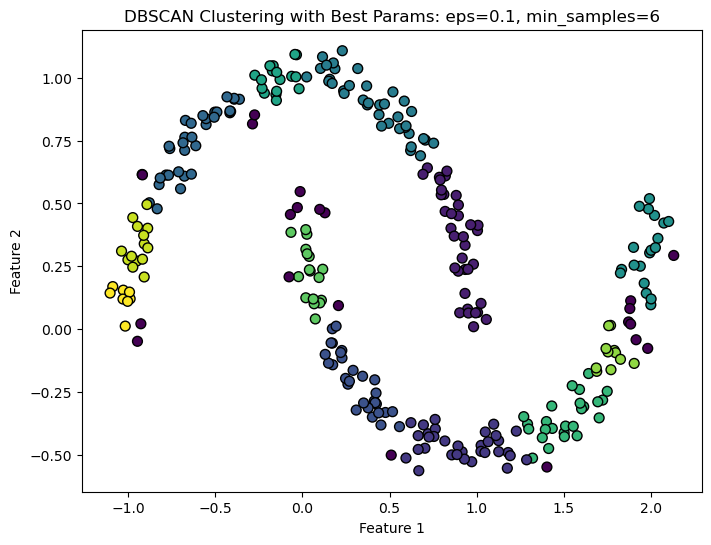

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_best, cmap='viridis', 
            marker='o', edgecolor='k', s=50)
plt.title(f"DBSCAN Clustering with Best Params: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()